- Load the data 
- Clean it 
- Choose the target variable 
- Encode the data ( for it to be usable by the model ) 
- Split it into train and test sets 
- ⁠load the model into a variable for you to use it ( this is without going through the hyper parameter tuning ) 
- ⁠fit the training data into that model 
- ⁠do simple predictions with the model 
- ⁠evaluate the model 
- ⁠hyper parameter fine tuning ( either grid search logic and process we learned before ) 
- ⁠use those parameters in the same model when loading it in the variable I talked about 
- ⁠then fit the training data in the new model with the right hyper parameters, 
- ⁠then do predictions 
- ⁠then evaluate it and see if there. Is any improvement in the accuracy of the model…

### 1. Load the necessary dataset and libraries


In [1]:
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, root_mean_squared_error

In [2]:
#### load the dataet
heart=pd.read_csv("heart_failure_clinical_records.csv")
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [3]:
heart.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# Checking for null values in the dataset
null_values = heart.isnull().sum()
print(null_values)


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


#### Encoding data

In [6]:
heart.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


#### look for outliers

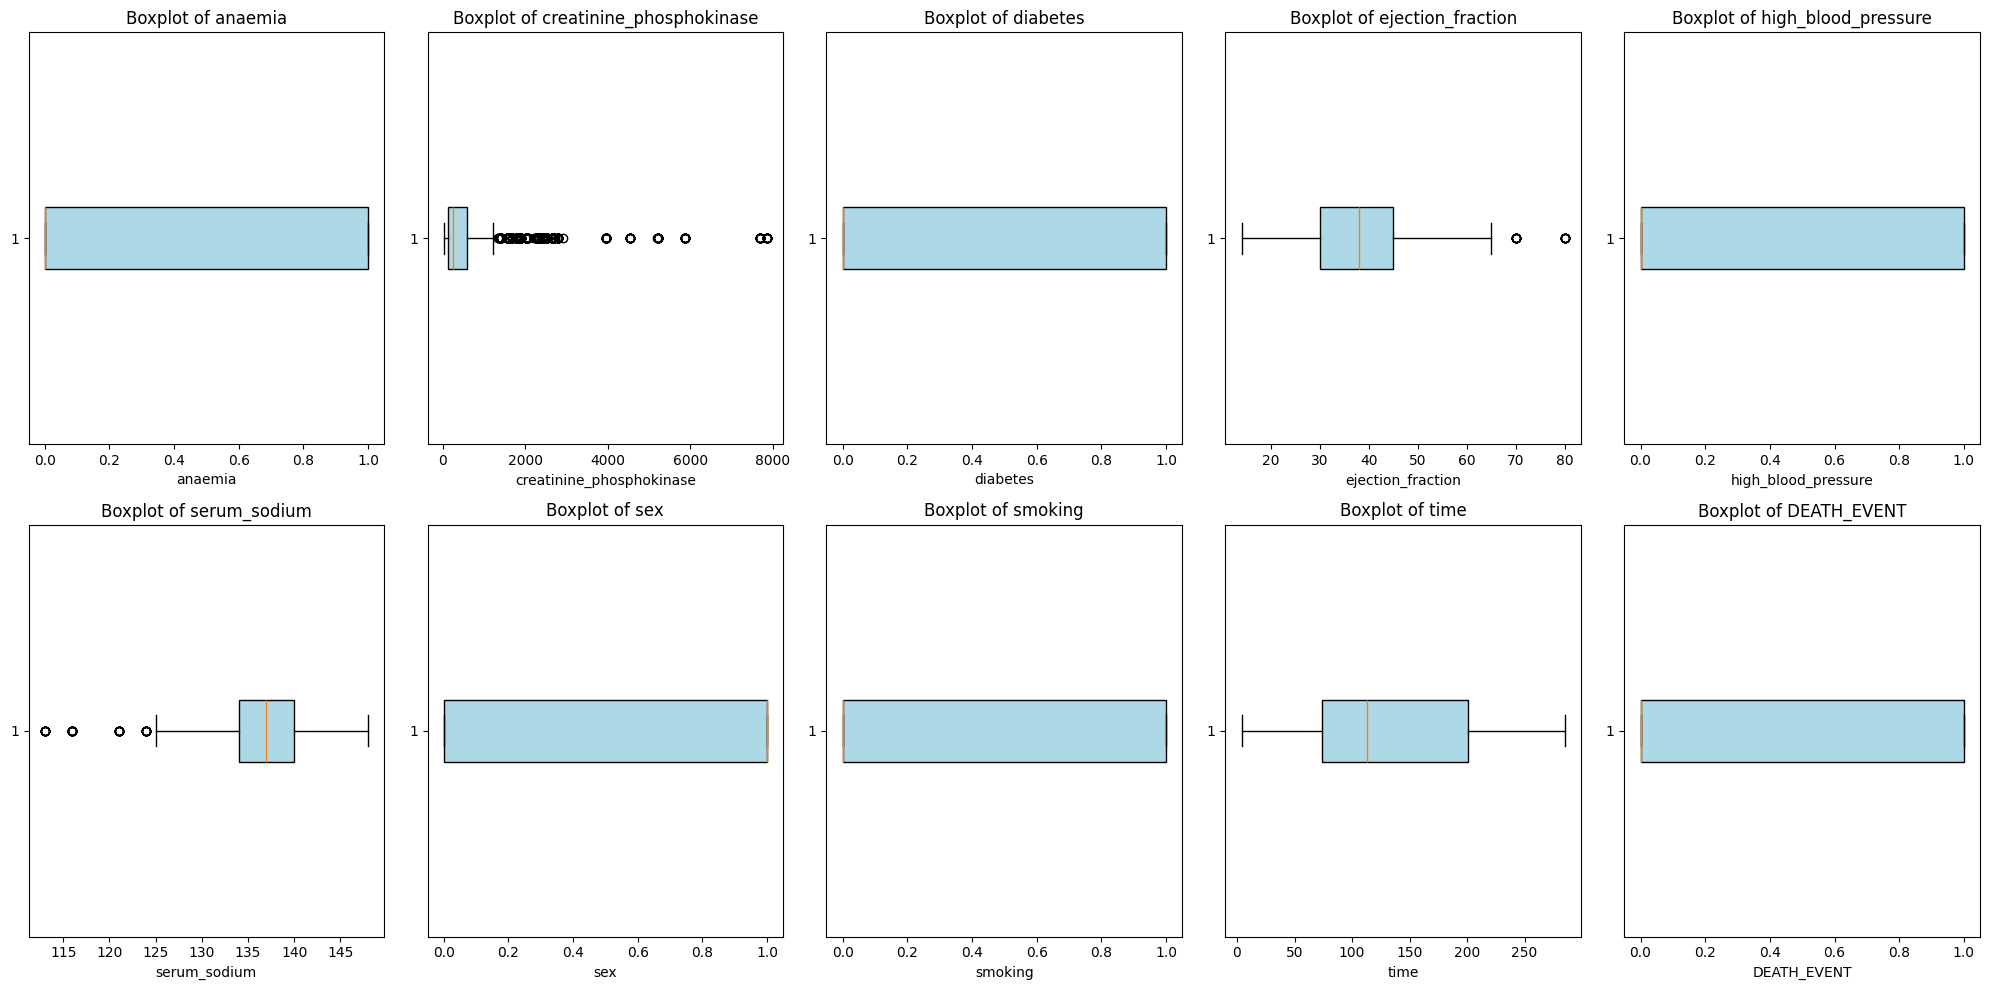

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame containing the data
numeric_columns = ['anaemia', 'creatinine_phosphokinase', 'diabetes',
                   'ejection_fraction', 'high_blood_pressure',
                   'serum_sodium', 'sex', 'smoking', 'time',
                   'DEATH_EVENT']  # Ensure these columns are in your DataFrame and numeric if required

plt.figure(figsize=(20, 10))  # Adjusted figure size for better display

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 5, i)  # 2 rows and 5 columns layout for better spacing
    plt.boxplot(heart[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()


#### Correlation

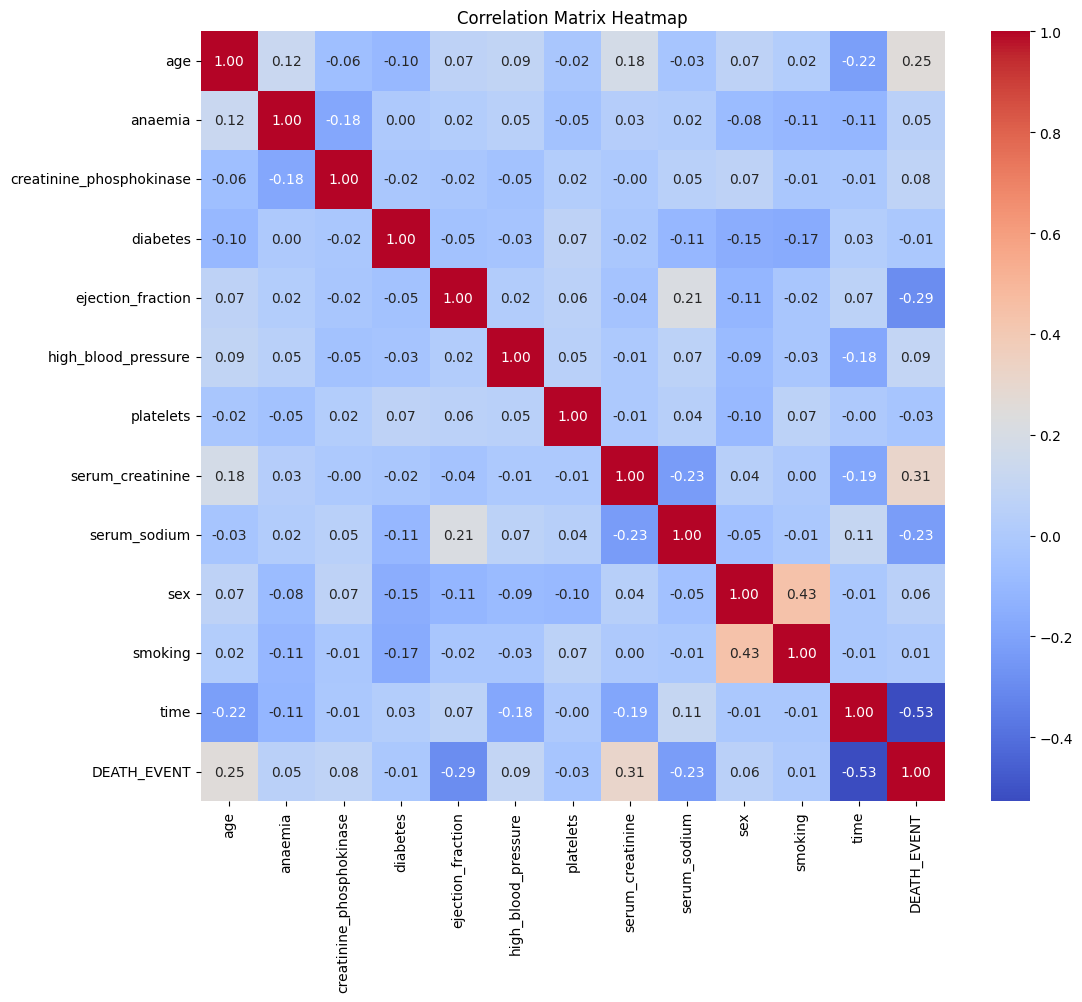

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = heart.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


#### choose target variable
the target variable is Heart disease

In [13]:
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

 #### Split it into train and test sets 

In [ ]:
from sklearn.model_selection import train_test_split


X = heart.drop(columns=['DEATH_EVENT'])  # Features
y = heart['DEATH_EVENT']                # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (4000, 12), Test set size: (1000, 12)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#### standardize the data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data and only transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### load the model

In [17]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')


print(svc_model)

SVC(kernel='linear')


In [18]:
### train the modeel
svc_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [19]:
#### make predictions
y_pred = svc_model.predict(X_test_scaled)

##### Evaluate the model

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8560
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       698
           1       0.76      0.77      0.76       302

    accuracy                           0.86      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.86      0.86      0.86      1000



In [21]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 88.70%


#### Applying Hyperparameters
1. idemtify the best parameters
2. use the best parameters to train the model
3. evalutate the model


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV with SVM and parameter grid
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [25]:
# Apply the best parameters to a new SVM model
optimized_svm_model = SVC(**best_params)

# Fit the optimized model on the training data
optimized_svm_model.fit(X_train_scaled, y_train)


SVC(C=100, gamma=1)

In [30]:
# Make predictions using the optimized model
y_optimized_pred = optimized_svm_model.predict(X_test_scaled)

# Calculate the accuracy of the optimized model
optimized_accuracy = accuracy_score(y_test, y_optimized_pred)
print(f"Optimized Model Accuracy: {optimized_accuracy:.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Optimized Model Accuracy: 97.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       698
           1       0.86      0.75      0.80       302

    accuracy                           0.89      1000
   macro avg       0.88      0.85      0.86      1000
weighted avg       0.89      0.89      0.88      1000



#### plot a confusion metric to illustrate the accuracy of the model

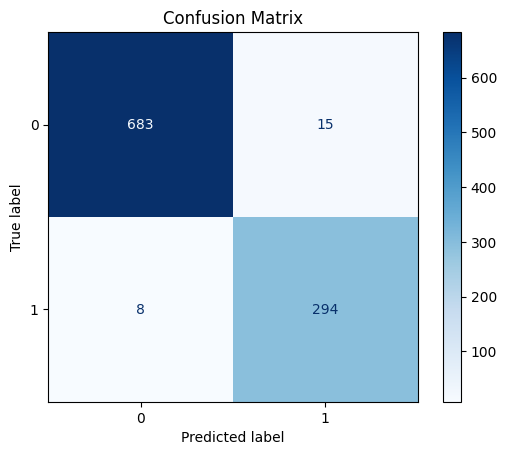

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_optimized_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=optimized_svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


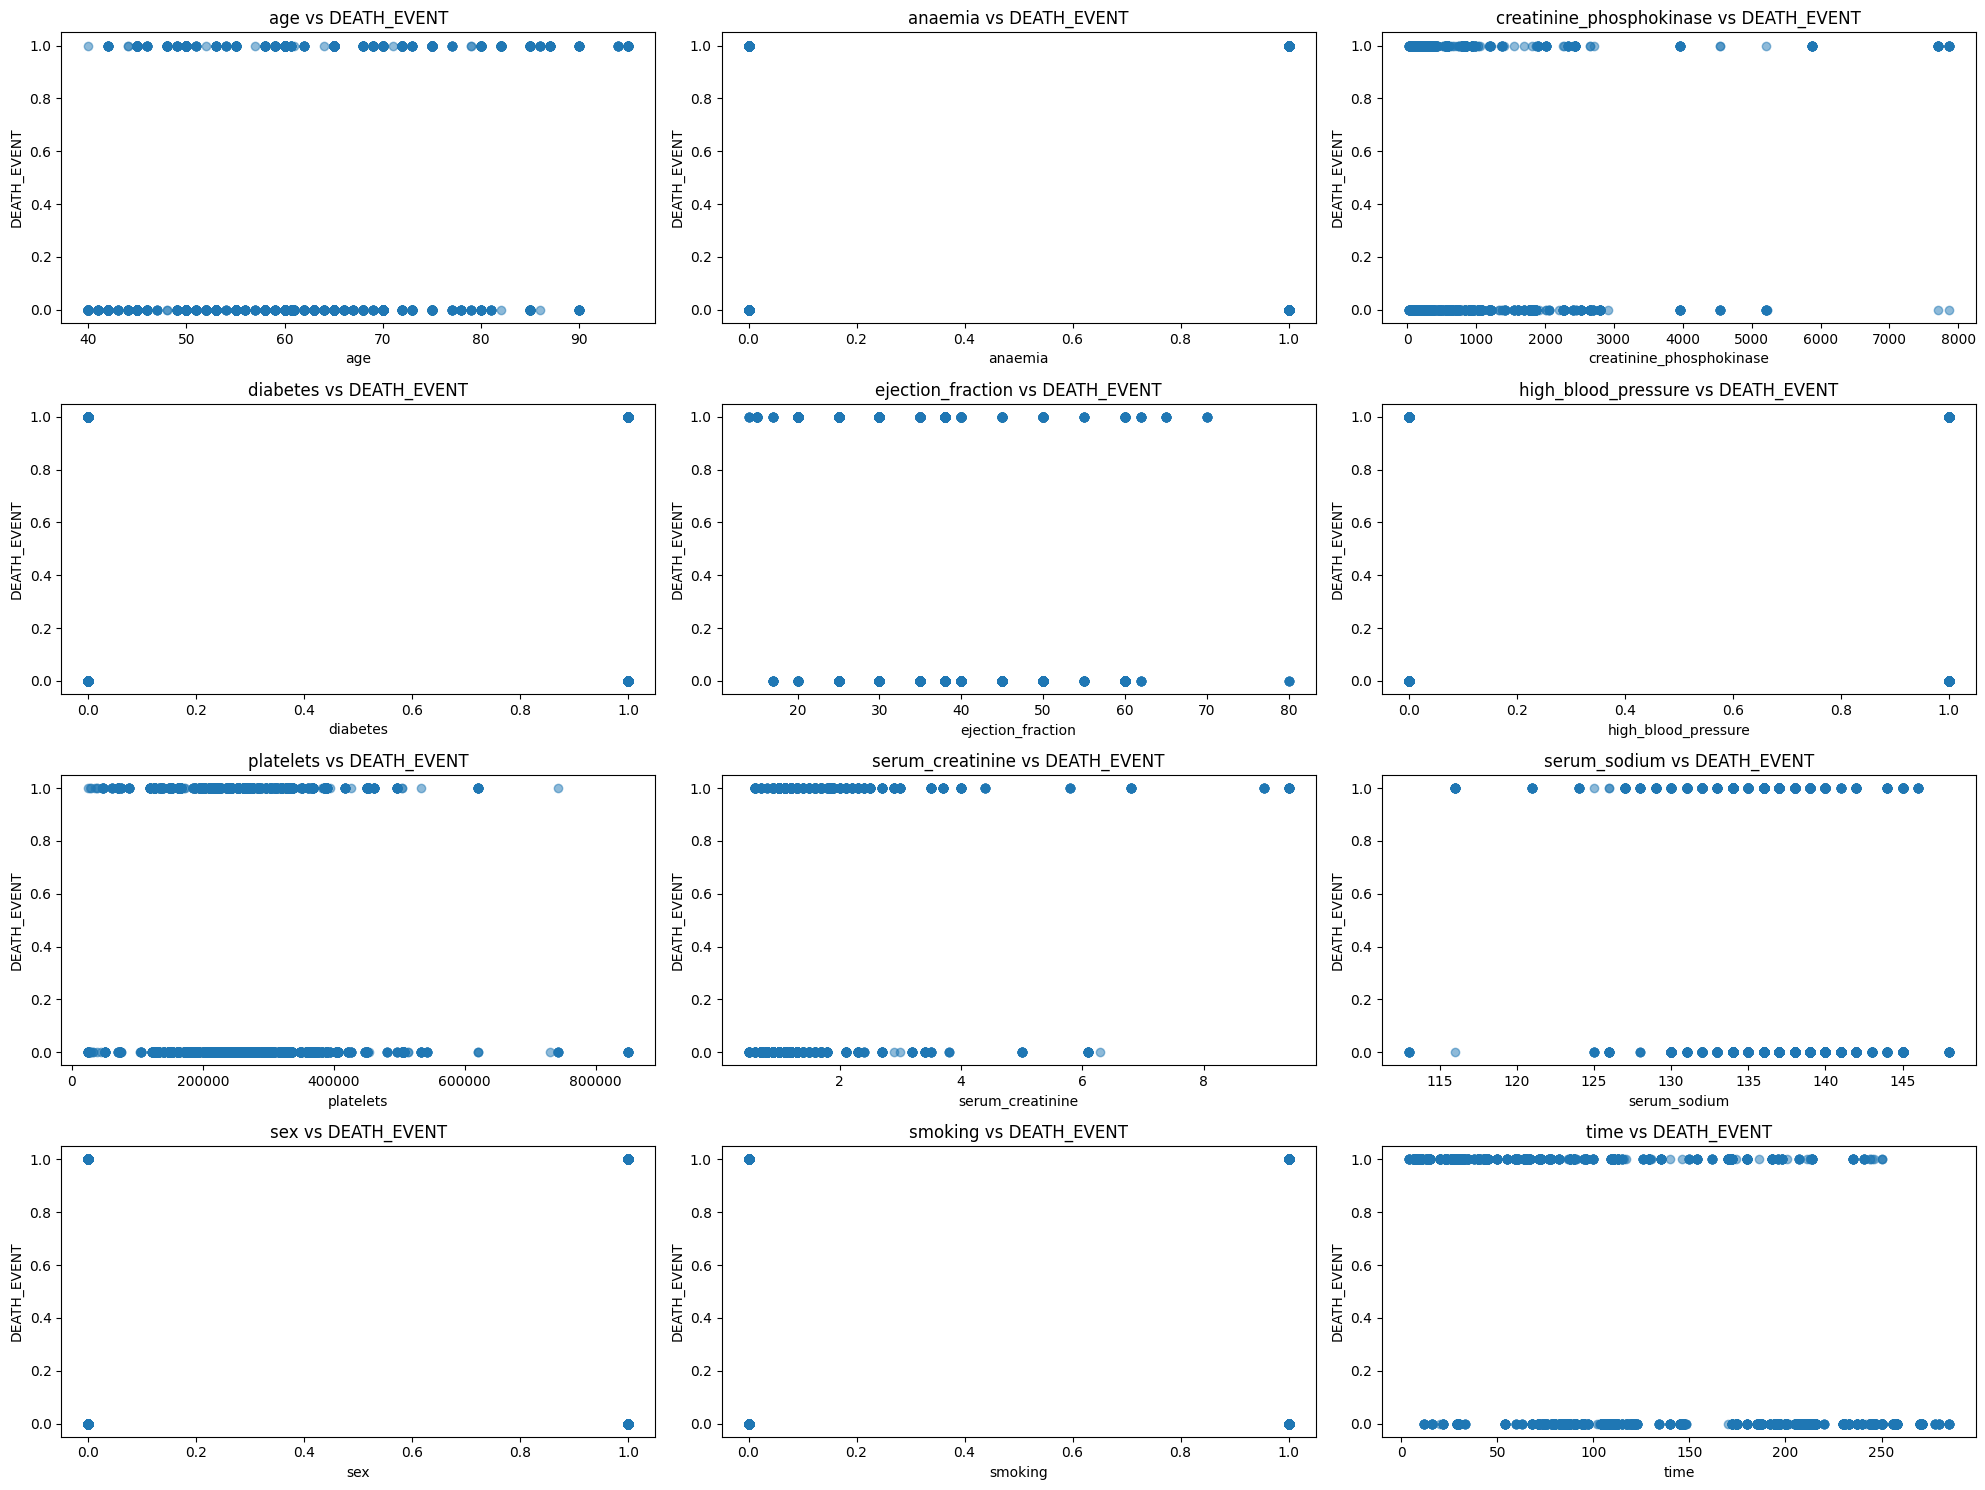

In [28]:
import matplotlib.pyplot as plt

# Plotting each feature against 'DEATH_EVENT'
features = X.columns  # All features excluding the target variable
target = 'DEATH_EVENT'

# Creating subplots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    plt.scatter(heart[feature], heart[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")

plt.tight_layout()
plt.show()



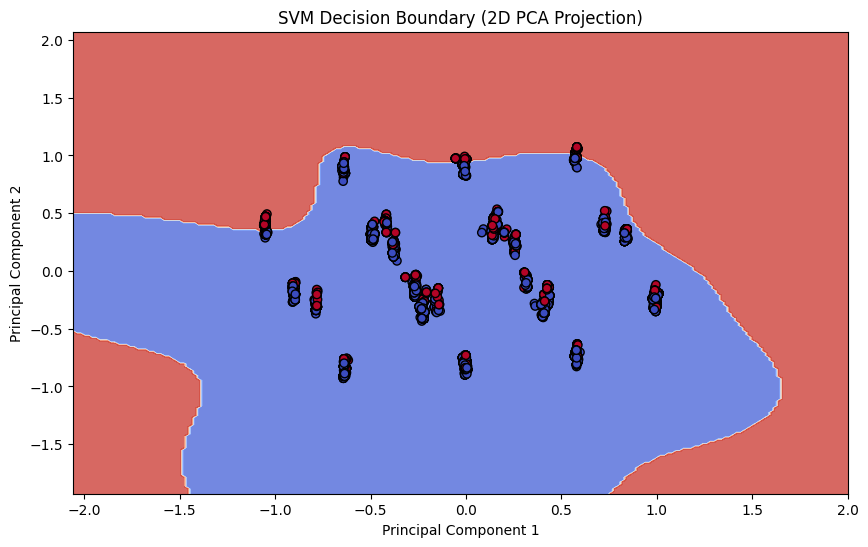

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducing the dimensionality to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fitting the SVM model on the reduced data
svm_model_2d = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model_2d.fit(X_train_pca, y_train)

# Plotting decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()





























